# Keras

## Data Preparation and Processing

Data processing for deep learning will vary greatly depending on the type of data we're working with and the type of task we'll be using the network for.

We'll start out with a very simple classification task using a simple numerical data set. Later in the course, we'll work with other types of data and other tasks.

We first need to import the libraries we'll be working with.

In [1]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

### Generate train samples/labels

Next, we create two empty lists. One will hold the input data, the other will hold the target data.

In [2]:
train_labels = []
train_samples = []

### Data Creeation

For this simple task, we'll **generate** our own example data set.

Example data:

- An experimental drug tested in individuals from ages 13 to 100 in a clinical trial.
- The trial had 2100 participants. Half were uder 65 years old, half were 65 years or older.
- Around 95% of patients 65 or older experienced side effects.
- Around 95% of patients under 65 experienced no side effects.

The block of code below shows how to generate this dummy data.

In [3]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

### Summary of our data:

In [4]:
mylist = [(j,train_labels[i]) for i, j in enumerate(train_samples)]
mylist[0:10]

[(33, 1),
 (94, 0),
 (50, 1),
 (87, 0),
 (39, 1),
 (97, 0),
 (25, 1),
 (92, 0),
 (57, 1),
 (95, 0)]

A `0` indicates that an individual did not experience a side effect, and a `1` indicates that an individual did experience a side effect.

### Data Process

Next, we **process** our data: (to be in the format required by the `fit()` function which `numpy array`.)

The shuffle stage is performed to get rid of any imposed order from the data generation process!

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

### Normalization

We'll first scale the range of features (ages) from 13-100 to 0-1.

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

The reshape is a foramlity, a technical requirement just since the `fit_transform()` function doesn't accept `1D` data by default.

In [7]:
train_samples.shape, train_samples.reshape(-1,1).shape

((2100,), (2100, 1))

Now that the data has been scaled, let's iterate over the scaled data to see what it looks like now.

In [8]:
train_samples[0:10], scaled_train_samples[0:10]

(array([19, 50, 85, 47, 56, 86, 28, 92, 99, 51]),
 array([[0.06896552],
        [0.42528736],
        [0.82758621],
        [0.3908046 ],
        [0.49425287],
        [0.83908046],
        [0.17241379],
        [0.90804598],
        [0.98850575],
        [0.43678161]]))

As expected, all of the data has been transformed to numbers between `0` and `1`.

At this point, we've generated some sample raw data, put it into the numpy format that our model will require, and rescaled it to a scale ranging from `0` to `1`.

## Simple `tf.keras` Sequential Model

Now we create artificial neural network for which we can train on this data.

<img src="./images/sequential.png" alt="Drawing" style="width: 400px;"/>


In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

- **Sequential** aliases:
    - Class `tf.keras.Sequential`
    - Class `tf.keras.models.Sequential`
    
    Optionally, the first layer can receive an `input_shape` argument:
```python
model = Sequential()
model.add(Dense(32, input_shape=(500,)))
```
Afterwards, we do automatic shape inference:
```python
model.add(Dense(32))
```
This (the first layer) is identical to the following:
```python
model = Sequential()
model.add(Dense(32, input_dim=500))
```
And to the following:
```python
model = Sequential()
model.add(Dense(32, batch_input_shape=(None, 500)))    
```
- **Activation** applies an activation function to an output. Activation function, such as `tf.nn.relu`, or string name of built-in activation function, such as `"relu"`.
    
    _Available activations:_
    - `relu` function: Applies the rectified linear unit activation function. With default values, this returns the standard ReLU activation: `max(x, 0)`, the element-wise maximum of 0 and the input tensor. Modifying default parameters allows you to use non-zero thresholds, change the max value of the activation, and to use a non-zero multiple of the input for values below the threshold.
    - `sigmoid` function: Sigmoid activation function, `sigmoid(x) = 1 / (1 + exp(-x))`. Applies the sigmoid activation function. For small values (<-5), `sigmoid` returns a value close to zero, and for large values (>5) the result of the function gets close to 1. Sigmoid is equivalent to a 2-element Softmax, where the second element is assumed to be zero. The sigmoid function always returns a value between 0 and 1.
    - `softmax` function: Softmax converts a vector of values to a probability distribution. The elements of the output vector are in range (0, 1) and sum to 1. Each vector is handled independently. The `axis` argument sets which axis of the input the function is applied along. Softmax is often used as the activation for the last layer of a classification network because the result could be interpreted as a probability distribution. The softmax of each vector x is computed as `exp(x) / tf.reduce_sum(exp(x))`. The input values in are the log-odds of the resulting probability.
    - `softplus` function: Softplus activation function, `softplus(x) = log(exp(x) + 1)`.
    - `softsign` function: Softsign activation function, `softsign(x) = x / (abs(x) + 1)`.
    - `tanh` function: Hyperbolic tangent activation function.
    - `selu` function: Scaled Exponential Linear Unit (SELU). The Scaled Exponential Linear Unit (SELU) activation function is defined as:
            - `if x > 0: return scale * x`
            - `if x < 0: return scale * alpha * (exp(x) - 1)`
        where `alpha` and `scale` are pre-defined constants (`alpha=1.67326324` and `scale=1.05070098`). Basically, the SELU activation function multiplies `scale` (> 1) with the output of the `tf.keras.activations.elu` function to ensure a slope larger than one for positive inputs. The values of `alpha` and `scale` are chosen so that the mean and variance of the inputs are preserved between two consecutive layers as long as the weights are initialized correctly (see `tf.keras.initializers.LecunNormal` initializer) and the number of input units is "large enough" (see reference paper for more information).
    - `elu` function: Exponential Linear Unit. The exponential linear unit (ELU) with `alpha > 0` is: `x` if `x > 0` and `alpha * (exp(x) - 1)` if `x < 0` The ELU hyperparameter `alpha` controls the value to which an ELU saturates for negative net inputs. ELUs diminish the vanishing gradient effect. ELUs have negative values which pushes the mean of the activations closer to zero. Mean activations that are closer to zero enable faster learning as they bring the gradient closer to the natural gradient. ELUs saturate to a negative value when the argument gets smaller. Saturation means a small derivative which decreases the variation and the information that is propagated to the next layer.
    - `exponential` function: Exponential activation function.
    <img src="./images/activation.png" alt="Drawing" style="width: 700px;"/>

- **Dense** is just your regular densely-connected NN layer.
- **Adam optimization** is a **stochastic** gradient descent method that is based on adaptive estimation of first-order and second-order moments. The method is "*computationally efficient, has little memory requirement, invariant to diagonal rescaling of gradients, and is well suited for problems that are large in terms of data/parameters*".
- **categorical_crossentropy** computes the crossentropy metric between the labels and predictions.

    The categorical crossentropy loss function calculates the loss of an example by computing the following sum:
    $$
    \mathrm{Loss} = -\sum_{i=1}^{\mathrm{output \atop size}} y_i \cdot \mathrm{log}\; {\hat{y}}_i
    $$
    where $\hat{y}_i$ is the $i$-th scalar value in the model output, $y_i$ is the corresponding target value, and output size is the number of scalar values in the model output.
    This loss is a very good measure of how distinguishable two discrete probability distributions are from each other. In this context, $y_i$ is the probability that event $i$ occurs and the sum of all $y_i$ is 1, meaning that exactly one event may occur.
    The minus sign ensures that the loss gets smaller when the distributions get closer to each other. In binary classification, where the number of classes M equals 2, cross-entropy can be calculated as:
    
    $$
    −(ylog(\hat{y})+(1−y)log(1−\hat{y}))
    $$
    
    **Note:** `softmax` is the only activation function recommended to use with the categorical crossentropy loss function.

    Strictly speaking, the output of the model only needs to be positive so that the logarithm of every output value $\hat{y}_i$ exists. However, the main appeal of this loss function is for comparing two probability distributions. The softmax activation rescales the model output so that it has the right properties.

If you are running the code on a GPU run this to make sure that tensorflow has identified you GPU:

In [10]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Build the model

In [11]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

#### Notes:

1. `model` is an instance of a `Sequential` object. A `tf.keras.Sequential` model is a **linear stack of layers**. It accepts a `list`, and each element in the list should be a layer.

2. **units** is a positive integer that shows dimensionality of the output space

3. The first dense layer is not the input layer. The input layer is the input to this layer which is in this case, has the shape `input_shape(1,)`.

4. The last dense layer is the output layer, which corresponds to the two possible scenarios of having side effect or not.

As you can see, we have passed a list of layers to the `Sequential` constructor. Let's go through each of the layers in this list now.

**First Hidden Layer**

Our first layer is a `Dense` layer. This type of layer is our standard fully-connected or densely-connected neural network layer. The first required parameter that the `Dense` layer expects is the number of neurons or `units` the layer has, and we're arbitrarily setting this to `16`.

Additionally, the model needs to know the shape of the input data. For this reason, we specify the shape of the input data in the first hidden layer in the model (and only this layer). The parameter called `input_shape` is how we specify this.

As discussed, we'll be training our network on the data that we generated and processed above, and recall, this data is one-dimensional. The `input_shape` parameter expects a tuple of integers that matches the shape of the input data, so we correspondingly specify `(1,)` as the `input_shape` of our one-dimensional data.

You can think of the way we specify the `input_shape` here as acting as an implicit input layer. The input layer of a neural network is the underlying raw data itself, therefore we don't create an explicit input layer. This first `Dense` layer that we're working with now is actually the first hidden layer.

Lastly, an optional parameter that we'll set for the `Dense` layer is the `activation` function to use after this layer. We'll use the popular choice of `relu`. Note, if you don't explicitly set an activation function, then Keras will use the `linear` activation function.

**Second Hidden Layer**

Our next layer will also be a `Dense` layer, and this one will have `32` nodes. The choice of how many neurons this node has is also arbitrary, as the idea is to create a simple model, and then test and experiment with it. If we notice that it is insufficient, then at that time, we can troubleshoot the issue and begin experimenting with changing parameters, like number of layers, nodes, etc.

This `Dense` layer will also use `relu` as its activation function.

**Output Layer**

Lastly, we specify the output layer. This layer is also a `Dense` layer, and it will have `2` neurons. This is because we have two possible outputs: either a patient experienced side effects, or the patient did not experience side effects.

This time, the activation function we'll use is `softmax`, which will give us a probability distribution among the possible outputs.

Note that we can call `summary()` on our `model` to get a quick visualization of it.

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


**Calculation for Params:**
- First Layer: number of `w: 16*1`, number of `b: 16` $\rightarrow$ `param = 16+16=32`
- Second Layer: number of `w: 16*32=512`, number of `b: 32` $\rightarrow$ `param = 512+32=544`
- First Layer: number of `w: 2*32=64`, number of `b: 2` $\rightarrow$ `param = 64+2=66`

### Compile the model

The first thing we need to do to get the model ready for training is call the compile() function on it.

In [13]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

- This function configures the model for training and expects a number of parameters. First, we specify the `optimizer` `Adam`. `Adam` accepts an optional parameter `learning_rate`, which we'll set to `0.0001`.

- Adam optimization is a stochastic gradient descent (SGD) method.

- The next parameter we specify is `loss`. We'll be using `sparse_categorical_crossentropy`, given that our labels are in integer format.

- Note that when we have only two classes, we could instead configure our output layer to have only one output, rather than two, and use `binary_crossentropy` as our loss, rather than `categorical_crossentropy`. Both options work equally well and achieve the exact same result.

- With `binary_crossentropy`, however, the last layer would need to use sigmoid, rather than softmax, as its activation function.

- Moving on, the last parameter we specify in `compile()` is `metrics`. This parameter expects a list of metrics that we'd like to be evaluated by the model during training and testing. We'll set this to a list that contains the string `‘accuracy'`.

- `verbose` in the following line refers to output message, which can be set to 0, 1, 2. 

### Train the model

Now that the model is compiled, we can train it using the `fit()` function.

- We set the `epochs` to `30`. Note that an epoch is a single pass of all the data to the network.
    
-  We specify `verbose=2`. This just specifies how much output to the console we want to see during each epoch of training. The verbosity levels range from `0` to `2`, so we're getting the most verbose output.

- The `batch_size` is the number of samples that are passed to the network at once. Note that a batch is also commonly referred to as a *mini-batch*.

***Why we use more than one Epoch?*** 
    
We are using a limited dataset and to optimise the learning and the graph we are using Gradient Descent which is an iterative process. So, updating the weights with single pass or one epoch is not enough.
    
***Why Use Batches?***

Well, for one, generally the larger the batch size, the quicker our model will complete each epoch during training. This is because, depending on our computational resources, our machine may be able to process much more than one single sample at a time.

The trade-off, however, is that even if our machine can handle very large batches, the quality of the model may degrade as we set our batch larger and may ultimately cause the model to be unable to generalize well on data it hasn't seen before.

In general, the batch size is another one of the **hyperparameters** that we must test and tune based on how our specific model is performing during training. This parameter will also have to be tested in regards to how our machine is performing in terms of its resource utilization when using different batch sizes.

For example, if we were to set our batch size to a relatively high number, say **100**, then our machine may not have enough computational power to process all **100** images in parallel, and this would suggest that we need to lower our batch size.

> **Note:** Batch size impacts learning significantly. What happens when you put a batch through your network is that you average the gradients. The concept is that if your batch size is big enough, this will provide a stable enough estimate of what the gradient of the full dataset would be. By taking samples from your dataset, you estimate the gradient while reducing computational cost significantly. The lower you go, the less accurate your esttimate will be, however in some cases these noisy gradients can actually help escape local minima. When it is too low, your network weights can just jump around if your data is noisy and it might be unable to learn or it converges very slowly, thus negatively impacting total computation time.

In [14]:
model.fit(x=scaled_train_samples, y=train_labels, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
210/210 - 2s - loss: 0.7299 - accuracy: 0.4233
Epoch 2/30
210/210 - 1s - loss: 0.6993 - accuracy: 0.3562
Epoch 3/30
210/210 - 0s - loss: 0.6726 - accuracy: 0.5824
Epoch 4/30
210/210 - 0s - loss: 0.6523 - accuracy: 0.6300
Epoch 5/30
210/210 - 0s - loss: 0.6304 - accuracy: 0.6810
Epoch 6/30
210/210 - 1s - loss: 0.6081 - accuracy: 0.7190
Epoch 7/30
210/210 - 1s - loss: 0.5855 - accuracy: 0.7543
Epoch 8/30
210/210 - 0s - loss: 0.5615 - accuracy: 0.7814
Epoch 9/30
210/210 - 1s - loss: 0.5347 - accuracy: 0.8071
Epoch 10/30
210/210 - 1s - loss: 0.5094 - accuracy: 0.8267
Epoch 11/30
210/210 - 0s - loss: 0.4853 - accuracy: 0.8443
Epoch 12/30
210/210 - 0s - loss: 0.4625 - accuracy: 0.8543
Epoch 13/30
210/210 - 0s - loss: 0.4409 - accuracy: 0.8710
Epoch 14/30
210/210 - 0s - loss: 0.4208 - accuracy: 0.8786
Epoch 15/30
210/210 - 0s - loss: 0.4025 - accuracy: 0.8867
Epoch 16/30
210/210 - 0s - loss: 0.3860 - accuracy: 0.9019
Epoch 17/30
210/210 - 0s - loss: 0.3708 - accuracy: 0.9005
Epoch 

Judging by the loss and accuracy, we can see that both metrics steadily improve over time with accuracy reaching almost `93%` and loss steadily decreasing until we reach `0.27`.

### Create a validation set

There are two ways to create a validation set to use with a `tf.keras.Sequential` model.

**Manually Create Validation Set**

The first way is to create a data structure to hold a validation set, and place data directly in that structure in the same nature we did for the training set.

This data structure should be a tuple `valid_set = (x_val, y_val)` of Numpy arrays or tensors, where `x_val` is a numpy array or tensor containing validation samples, and `y_val` is a numpy array or tensor containing validation labels.

When we call `model.fit()`, we would pass in the validation set in addition to the training set. We pass the validation set by specifying the `validation_data` parameter.

```python
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_data=valid_set
    , batch_size=10
    , epochs=30
    , verbose=2
)
```
When the model trains, it would continue to train only on the training set, but additionally, it would also be evaluating the validation set.

**Create Validation Set With Keras**

There is another way to create a validation set, and it saves a step!

If we don't already have a specified validation set created, then when we call `model.fit()`, we can set a value for the `validation_split` parameter. It expects a fractional number between `0` and `1`. Suppose that we set this parameter to `0.1`.

```python
model.fit(
      x=scaled_train_samples
    , y=train_labels
    , validation_split=0.1
    , batch_size=10
    , epochs=30
    , verbose=2
)
```
With this parameter specified, Keras will split apart a fraction (`10%` in this example) of the training data to be used as validation data. The model will set apart this fraction of the training data, will not train on it, and will evaluate the loss and any model metrics on this data at the end of each epoch.

Note that the `fit()` function shuffles the data before each epoch by default. When specifying the `validation_split` parameter, however, the validation data is selected from the last samples in the `x` and `y` data ***before*** shuffling. In this case the validation set would be the **last** 10% of the original dataset. This means if the initial dataset is not well shuffled, the training and validation sets will not contain a balance portion of all data categories.

Note also `shuffle` is by default set to `True` when you call `.fit()`.

In [15]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, shuffle=True, verbose=2)

Epoch 1/30
189/189 - 4s - loss: 0.2719 - accuracy: 0.9333 - val_loss: 0.2948 - val_accuracy: 0.9286
Epoch 2/30
189/189 - 0s - loss: 0.2693 - accuracy: 0.9349 - val_loss: 0.2949 - val_accuracy: 0.9286
Epoch 3/30
189/189 - 1s - loss: 0.2674 - accuracy: 0.9370 - val_loss: 0.2922 - val_accuracy: 0.9286
Epoch 4/30
189/189 - 0s - loss: 0.2653 - accuracy: 0.9370 - val_loss: 0.2908 - val_accuracy: 0.9286
Epoch 5/30
189/189 - 0s - loss: 0.2636 - accuracy: 0.9370 - val_loss: 0.2903 - val_accuracy: 0.9286
Epoch 6/30
189/189 - 0s - loss: 0.2621 - accuracy: 0.9402 - val_loss: 0.2893 - val_accuracy: 0.9286
Epoch 7/30
189/189 - 0s - loss: 0.2605 - accuracy: 0.9370 - val_loss: 0.2886 - val_accuracy: 0.9476
Epoch 8/30
189/189 - 0s - loss: 0.2593 - accuracy: 0.9429 - val_loss: 0.2877 - val_accuracy: 0.9476
Epoch 9/30
189/189 - 1s - loss: 0.2582 - accuracy: 0.9413 - val_loss: 0.2867 - val_accuracy: 0.9476
Epoch 10/30
189/189 - 1s - loss: 0.2570 - accuracy: 0.9423 - val_loss: 0.2856 - val_accuracy: 0.9476

### Generate test samples/labels

We call this process **inference**, as the model is using its knowledge gained from training and using it to infer a prediction or result.

In [16]:
test_labels = []
test_samples = []

In [17]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [18]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [19]:
scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

### Evaluating The Test Set (Prediction)

To get predictions from the model for the test set, we call `model.predict()`.

In [20]:
predictions = model.predict(x=scaled_test_samples, batch_size=10, verbose=0)

To see what the model's predictions look like, we can iterate over them and print them out.

In [21]:
predictions[0:10]

array([[0.04277088, 0.9572291 ],
       [0.95468587, 0.04531415],
       [0.01525621, 0.9847438 ],
       [0.01261743, 0.9873826 ],
       [0.96318185, 0.03681811],
       [0.02026236, 0.9797377 ],
       [0.02446038, 0.9755397 ],
       [0.9668005 , 0.03319953],
       [0.02446038, 0.9755397 ],
       [0.01843655, 0.98156345]], dtype=float32)

*Note*: Each element in the `predictions` list is itself a list of length `2`. The sum of the two values in each list is `1`. The reason for this is because the two columns contain probabilities for each possible output: *experienced side effects* and *did not experience side effects*. Each element in the predictions list is a probability distribution over all possible outputs.

The first column contains the probability for each patient not experiencing side effects, which is represented by a `0`. The second column contains the probability for each patient experiencing side effects, which is represented by a `1`.

We can also look only at the most probable prediction.

In [22]:
rounded_predictions = np.argmax(predictions, axis=-1)

In [23]:
rounded_predictions[0:10]


array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

From the printed prediction results, we can observe the underlying predictions from the model, however, we cannot judge how accurate these predictions are just by looking at the predicted output.

If we have corresponding labels for the test set, (for which, in this case, we do), then we can compare these true labels to the predicted labels to judge the accuracy of the model's evaluations.

### Confusion Matrix

With a confusion matrix, we'll be able to visually observe how well the model predicts on test data.

In [24]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

We then create the confusion matrix and assign it to the variable `cm`.

In [25]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

To the confusion matrix, we pass in the true labels `test_labels` as well as the network's predicted labels `rounded_predictions` for the test set.

Below, we have a function called `plot_confusion_matrix()` that came directly from [scikit-learn's website](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py). This is code that they provide in order to plot the confusion matrix.

In [26]:
def plot_confusion_matrix(cm, classes,
                         normalize=False,
                         title='Confision matrix',
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting 'normalize=True'.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Next, we define the labels for the confusion matrix. In our case, the labels are titled “no side effects” and “had side effects.”

In [27]:
cm_plot_labels = ['no_side_effects', 'had_side_effects']

Lastly, we plot the confusion matrix by using the `plot_confusion_matrix()` function we just discussed. To this function, we pass in the confusion matrix `cm` and the labels `cm_plot_labels`, as well as a title for the confusion matrix.

Confusion matrix, without normalization
[[194  16]
 [ 10 200]]


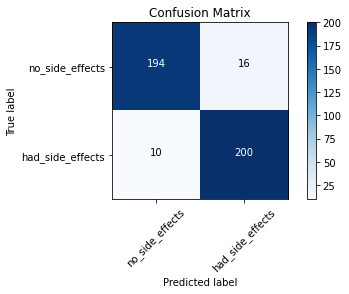

In [28]:
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Reading A Confusion Matrix
Looking at the plot of the confusion matrix, we have the predicted labels on the x-axis and the true labels on the y-axis. The blue cells running from the top left to bottom right contain the number of samples that the model accurately predicted. The white cells contain the number of samples that were incorrectly predicted.

There are 420 total samples in the test set. Looking at the confusion matrix, we can see that the model accurately predicted 391 out of `420` total samples. The model incorrectly predicted `22` out of the `420`.

For the samples the model got correct, we can see that it accurately predicted that the patients would experience no side effects `197` times. It incorrectly predicted that the patient would have no side effects `9` times when the patient did actually experience side effects.

On the other side, the model accurately predicted that the patient would experience side effects `201` times that the patient did indeed experience side effects. It incorrectly predicted that the patient would have side effects `13` times when the patient actually did not experience side effects.

As you can see, this is a good way we can visually interpret how well the model is doing at its predictions and understand where it may need some work.

### Save and Load a Model

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 1. `model.save()`

If we want to save a model at its current state after it was trained so that we could make use of it later, we can call the `save()` function on the model. To `save()`, we pass in the file path and name of the file we want to save the model to with an `h5` extension.

In [30]:
# check first so see if file already exists.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('./data/medical_trial_model.h5') is False:
    model.save('./data/medical_trial_model.h5')

The save funciton saves:

- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.

Now that we have this model saved, we can load the model at a later time.

To do so, we first import the `load_model()` function. Then, we can call the function to load the model by pointing to the saved model on disk.

In [31]:
from tensorflow.keras.models import load_model
new_model = load_model('./data/medical_trial_model.h5')

We can verify that the loaded model has the same architecture and weights as the saved model by calling `summary()` and `get_weights()` on the model.

In [32]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


The model weights, optimizer, loss, etc are the same as the previous one:

In [33]:
new_model.get_weights()

[array([[-0.0497371 , -0.0349154 ,  0.50795746,  0.1944536 ,  0.41503188,
          0.6195742 , -0.4195909 ,  0.6340579 , -0.02015758,  0.37429148,
         -0.19914958, -0.46304855, -0.11812198,  0.72698563, -0.29415265,
          0.24040183]], dtype=float32),
 array([ 0.        ,  0.12797663, -0.26442048,  0.22733383, -0.2167497 ,
        -0.1607651 ,  0.        , -0.31307754,  0.        , -0.19515987,
         0.        ,  0.        ,  0.        , -0.26145416,  0.        ,
         0.13202272], dtype=float32),
 array([[ 1.07045472e-02, -9.31730866e-03,  2.73203224e-01,
         -9.54874754e-02, -1.06944248e-01,  3.26881081e-01,
         -1.46031067e-01,  2.00321764e-01,  2.75579244e-01,
         -2.13044137e-01, -3.61552835e-03,  5.73611856e-02,
          2.36192644e-02,  1.03685290e-01, -2.35677168e-01,
         -3.42370570e-01,  2.96285242e-01, -2.74710804e-01,
         -3.36360931e-01,  1.44532174e-01,  3.27144951e-01,
         -8.41062367e-02, -2.15314671e-01, -1.27913073e-01,
 

In [34]:
new_model.optimizer

In [35]:
new_model.loss

<function tensorflow.python.keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)>

#### 2. `model.to_json()`

There is another way we save only the architecture of the model. This will not save the model weights, configurations, optimizer, loss or anything else. This only saves the architecture of the model.

We can do this by calling `model.to_json()`. This will save the architecture of the model as a JSON string. If we print out the string, we can see exactly what this looks like.

In [36]:
# save as JSON
json_string = model.to_json()

# save as YAML
# yaml_string = model.to_yaml()

In [37]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

Now that we have this saved, we can create a new model from it. First we'll import the needed `model_from_json` function, and then we can load the model architecture.

In [38]:
#model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from tensorflow.keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)

By printing the summary of the model, we can verify that the new model has the same architecture of the model that was previously saved.

In [39]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


#### 3. `model.save_weights()`

The last saving mechanism we'll discuss only saves the weights of the model.

We can do this by calling `model.save_weights()` and passing in the path and file name to save the weights to with an `h5` extension.

In [40]:
# check first so see if file already exists.
# If not, the model is saved to disk.
import os.path
if os.path.isfile('./data/my_model_weights.h5') is False:
    model.save_weights('./data/my_model_weights.h5')

At a later point, we could then load the saved weights in to a new model, but the new model will need to have the same architecture as the old model before the weights can be saved.

In [41]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [42]:
model2.load_weights('./data/my_model_weights.h5')

In [43]:
model2.get_weights()

[array([[-0.0497371 , -0.0349154 ,  0.50795746,  0.1944536 ,  0.41503188,
          0.6195742 , -0.4195909 ,  0.6340579 , -0.02015758,  0.37429148,
         -0.19914958, -0.46304855, -0.11812198,  0.72698563, -0.29415265,
          0.24040183]], dtype=float32),
 array([ 0.        ,  0.12797663, -0.26442048,  0.22733383, -0.2167497 ,
        -0.1607651 ,  0.        , -0.31307754,  0.        , -0.19515987,
         0.        ,  0.        ,  0.        , -0.26145416,  0.        ,
         0.13202272], dtype=float32),
 array([[ 1.07045472e-02, -9.31730866e-03,  2.73203224e-01,
         -9.54874754e-02, -1.06944248e-01,  3.26881081e-01,
         -1.46031067e-01,  2.00321764e-01,  2.75579244e-01,
         -2.13044137e-01, -3.61552835e-03,  5.73611856e-02,
          2.36192644e-02,  1.03685290e-01, -2.35677168e-01,
         -3.42370570e-01,  2.96285242e-01, -2.74710804e-01,
         -3.36360931e-01,  1.44532174e-01,  3.27144951e-01,
         -8.41062367e-02, -2.15314671e-01, -1.27913073e-01,
 

## Convolutional Neural Network (CNN)

The goal is to calssify a set of images to cats and dogs. We are going to use data from the following Kaggle competition [dogs-vs-cats](https://www.kaggle.com/c/dogs-vs-cats-redux-kernels-edition/data).

*Data Description:* The training archive contains 25,000 images of dogs and cats. Train your algorithm on these files and predict the labels for test1.zip (1 = dog, 0 = cat).

**Why Convolutions**

- **Parameter sharing:** a feature detector (such as a vertical edge detector) that’s useful in one part of the image is probably useful in another part of the image.
- **Sparsity of connections:** in each layer, each output value depends only on small number of inputs.

**CNN Architecture**
<img src="./images/CNN_Architecture.png" alt="Drawing" style="width: 800px;"/>

<img src="./images/CNN_Architecture2.png" alt="Drawing" style="width: 800px;"/>

In [44]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [45]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Data preparation

The images included in the `'./data/dogs-vs-cats/` directory are a random subset of the full cat and dog data set from the Kaggle competition.

Using the script below, we'll organize our data into `train`, `validation`, and `test` sets. We'll do this by moving subsets of the data into sub-directories for each separate data set.

In [46]:
# Organize data into train, valid, test dirs
os.chdir('../../Image-Classification/data/dogs-vs-cats/train-original')
if os.path.isdir('../train/dog') is False:
    os.makedirs('../train/dog')
    os.makedirs('../train/cat')
    os.makedirs('../valid/dog')
    os.makedirs('../valid/cat')
    os.makedirs('../test/dog')
    os.makedirs('../test/cat')
    
    for c in random.sample(glob.glob('cat*'), 500):
        shutil.move(c, '../train/cat')
    for c in random.sample(glob.glob('dog*'), 500):
        shutil.move(c, '../train/dog')
    for c in random.sample(glob.glob('cat*'), 100):
        shutil.move(c, '../valid/cat')
    for c in random.sample(glob.glob('dog*'), 100):
        shutil.move(c, '../valid/dog')
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c, '../test/cat')
    for c in random.sample(glob.glob('dog*'), 50):
        shutil.move(c, '../test/dog')
        
os.chdir('../../../../CS-Tutorial/Extra')

We first check to see if the directory structure is already in place. If it's not, we proceed with the script. The script first makes `train`, `valid`, and `test` directories, which each contain sub-directories called `dog` and `cat`.

The full data set contains `25,000` images, half of which are cats, and half are dogs. We don't need nearly this much data for the tasks we'll be carrying out, so we're going to work with a subset. The remainder of the script moves `1000` samples into the training set, `200` samples into the validation set, and `100` samples into the test set. Each set has have an equal amount of cats and dogs.

The remainder of the unused data will remain in the base `dogs-vs-cats` directory. 

We then create variables for which the the paths to the `train`, `valid`, and `test` data directories are assigned.

In [47]:
train_path = '../../Image-Classification/data/dogs-vs-cats/train'
valid_path = '../../Image-Classification/data/dogs-vs-cats/valid'
test_path = '../../Image-Classification/data/dogs-vs-cats/test'

We can either specify an absolute path or a relative path relative to where our Jupyter notebook resides. I'm specifying the relative path.

### Some preprocessing

Now, we use Keras' `ImageDataGenerator` class to create batches of data from the `train`, `valid`, and `test` directories.

In [48]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['cat', 'dog'], batch_size=10, shuffle=False)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


And we are verifying that disc is able to find all the images that we set up previouly.

In [49]:
assert train_batches.n == 1000
assert valid_batches.n == 200
assert test_batches.n == 100
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 2

`ImageDataGenerator.flow_from_directory()` creates a `DirectoryIterator`, which generates batches of normalized tensor image data from the respective data directories.

Notice, to `ImageDataGenerator` for each of the data sets, we specify `preprocessing_function=tf.keras.applications.vgg16.preprocess_input`. For now, just understand this does an additional processing step on the images. We'll cover what exactly this processing is when we work with the pre-trained VGG16 CNN in a future episode.

To `flow_from_directory()`, we first specify the `path` for the data. We then specify the `target_size` of the images, which will resize all images to the specified size. The size we specify here is determined by the input size that the neural network expects.

The `classes` parameter expects a list that contains the underlying class names, and lastly, we specify the `batch_size`.

We also specify `shuffle=False` only for `test_batches`. That's because, later when we plot the evaluation results from the model to a `confusion matrix`, we'll need to able to access the unshuffled labels for the test set. By default, the data sets are shuffled.

Note, in the case where you do not know the labels for the test data, you will need to modify the `test_batches` variable. Specifically, the change will be to set the parameters `classes = None` and `class_mode = None` in `flow_from_directory()`.

**Visualize The Data**

We now call `next(train_batches)` to generate a batch of images and labels from the training set. Note that the size of this batch is determined by the `batch_size` we set when we created `train_batches`.

In [50]:
imgs, labels = next(train_batches)

In [51]:
# This function will plot images in the form of a grid with 1 row and 10 columns where images are placed
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

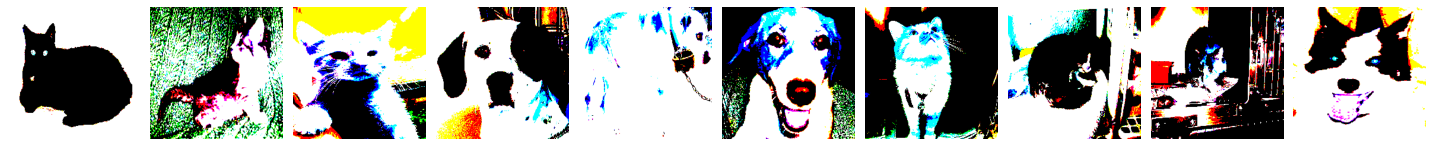

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]]


In [52]:
plotImages(imgs)
print(labels)

This is what the first processed random batch from the training set looks like. Notice that the color appears to be distorted. This has to do with the VGG16 processing we applied to the data sets, which we'll talk about in an upcoming episode. Don't worry about it for now, just know that the RGB pixel data has been processed in such a way that the image data now looks like this before being passed to the network.

Note that dogs are represented with the *one-hot encoding* of `[0,1]`, and cats are represented by `[1,0]`.

We're now all set up to work with this data! Next, we'll use this data to train a convolutional neural network.

### Build and train a CNN

To build the CNN, we'll use a Keras `Sequential` model.

- Conv2D: 2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If `use_bias` is True, a bias vector is created and added to the outputs. Finally, if `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model, provide the keyword argument `input_shape` (tuple of integers or `None`, does not include the sample axis), e.g. `input_shape=(128, 128, 3)` for 128x128 RGB pictures in `data_format="channels_last"`. You can use `None` when a dimension has variable size.
    - filters: Integer, the dimensionality of the output space (i.e. the number of output filters in the convolution).
    - kernel_size: An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
    - input_shape: 3 refers to three color channel of RGB format images
    - padding: one of "valid" or "same" (case-insensitive). "valid" means no padding. "same" results in padding with zeros evenly to the left/right or up/down of the input such that output has the same height/width dimension as the input.
- MaxPool2D: Downsamples the input along its spatial dimensions (height and width) by taking the maximum value over an input window (of size defined by pool_size) for each channel of the input. The window is shifted by strides along each dimension.
    - pool_size: integer or tuple of 2 integers, window size over which to take the maximum. (2, 2) will take the max value over a 2x2 pooling window. If only one integer is specified, the same window length will be used for both dimensions.
    - strides: Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. If None, it will default to `pool_size`.
- Flatten: flatten our pooled feature map into a column


In [53]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])

The first layer in the model is a 2-dimensional convolutional layer. This layer will have `32` output filters each with a kernel size of `3x3`, and we'll use the `relu` activation function.

Note that the choice for the number of output filters specified is arbitrary, and the chosen kernel size of `3x3` is generally a very common size to use. You can experiment by choosing different values for these parameters.

We enable `zero-padding` by specifying `padding = 'same'`

On the first layer only, we also specify the `input_shape`, which is the shape of our data. Our images are `224` pixels high and `224` pixels wide and have `3` color channels: RGB. This gives us an `input_shape` of `(224,224,3)`.

We then add a max pooling layer to pool and reduce the dimensionality of the data. 

We follow this by adding another convolutional layer with the exact specs as the earlier one, except for this second `Conv2D` layer has `64` filters. The choice of `64` here is again arbitrary, but the general choice of having more filters in later layers than in earlier ones is common. This layer is again followed by the same type of `MaxPool2D` layer.

We then `Flatten` the output from the convolutional layer and pass it to a `Dense` layer. This `Dense` layer is the output layer of the network, and so it has `2` nodes, one for cat and one for dog. We'll use the `softmax` activation function on our output so that the output for each sample is a probability distribution over the outputs of cat and dog.

### Some Fundamnetal Concepts:

- **max pooling:** Max Pooling is a downsampling strategy in Convolutional Neural Networks. This is done to in part to help over-fitting by providing an abstracted form of the representation. As well, it reduces the computational cost by reducing the number of parameters to learn and provides basic translation invariance to the internal representation.
    Max pooling is done by applying a max filter to (usually) non-overlapping subregions of the initial representation.
    <img src="./images/maxpooling.png" alt="Drawing" style="width: 400px;"/>
    Ingeneral, pooling layers reduce the dimensions of data by combining the outputs of neuron clusters at one layer into a single neuron in the next layer.
- **zero padding:** As described above, one tricky issue when applying convolutional layers is that we tend to lose pixels on the perimeter of our image. Since we typically use small kernels, for any given convolution, we might only lose a few pixels, but this can add up as we apply many successive convolutional layers. One straightforward solution to this problem is to add extra pixels of filler around the boundary of our input image, thus increasing the effective size of the image. 
    <img src="./images/padding.png" alt="Drawing" style="width: 400px;"/>
    
    **Note:** Sample types of pooling are `max pooling` and `avg pooling`, but these days `max pooling` is more common. It has hyper-parameters: `size (f)`, `stride (s)`, `type (max or avg)`

- **strides:** governs how many cells the filter is moved in the input to calculate the next cell in the result.
    <img src="./images/strides.png" alt="Drawing" style="width: 400px;"/>
- **Flattening:** used to flatten our pooled feature map into a column like in the image below.
    <img src="./images/Flatten1.png" alt="Drawing" style="width: 400px;"/>
    The reason we do this is that we're going to need to insert this data into an artificial neural network later on.
    <img src="./images/Flatten2.png" alt="Drawing" style="width: 400px;"/>
    
### Convolutional Filters:
    
***Kernel vs Filter:*** Before we dive into it, I just want to make the distinction between the terms ‘kernel’ and ‘filter’ very clear because I have seen a lot of people use them interchangeably. A kernel is, as described earlier, a matrix of weights which are multiplied with the input to extract relevant features. The dimensions of the kernel matrix is how the convolution gets it’s name. For example, in 2D convolutions, the kernel matrix is a 2D matrix.

A filter however is a concatenation of multiple kernels, each kernel assigned to a particular channel of the input. Filters are always one dimension more than the kernels. For example, in 2D convolutions, filters are 3D matrices (which is essentially a concatenation of 2D matrices i.e. the kernels). So for a CNN layer with kernel dimensions $h*w$ and input channels $k$, the filter dimensions are $k*h*w$.

A common convolution layer actually consist of multiple such filters.

- **1D, 2D and 3D Convolutions:**
1D convolutions are commonly used for time series data analysis (since the input in such cases is 1D). As mentioned earlier, the 1D data input can have multiple channels. The filter can move in one direction only, and thus the output is 1D. 
<img src="./images/1D.png" alt="Drawing" style="width: 400px;"/>
Next, let’s visualize a multi channel 2D convolution. In the diagram below, the kernel dimensions are 3*3 and there are multiple such kernels in the filter (marked yellow). This is because there are multiple channels in the input (marked blue) and we have one kernel corresponding to every channel in the input. Clearly, here the filter can move in 2 directions and thus the final output is 2D. 2D convolutions are the most common convolutions, and are heavily used in Computer Vision.        
    <img src="./images/filter1.png" alt="Drawing" style="width: 400px;"/>
    It is difficult to visualize a 3D filter (since it’s a 4D dimensional matrix), so we will discuss single channel 3D convolution here. As you can see from the image below, in 3D convolutions, a kernel can move in 3 directions and thus the output obtained is also 3D.
    <img src="./images/filter2.png" alt="Drawing" style="width: 400px;"/>

- **Transposed Convolution (Deconvolution)**
The figure below nicely captures how a 2D convolution decreases the dimensions of the input. But sometimes we need to do input processing such as to increase it’s dimensions (also called ‘upsampling’).
<img src="./images/Deconvolution1.png" alt="Drawing" style="width: 200px;"/>
To achieve this using convolutions, we use a modification known as transposed convolution or deconvolution (although it is not truly ‘reversing’ a convolution operation, so a lot of people don’t prefer to use this term). The dotted blocks in the GIF below represent padding.
<img src="./images/Deconvolution2.png" alt="Drawing" style="width: 200px;"/>
I think these figures give a good intuition of how different up-sampled outputs can be created from the same input, based on the padding pattern. Such convolutions are very commonly used in modern CNN networks, mainly because of their ability to increase the image dimensions.
<img src="./images/Deconvolution3.png" alt="Drawing" style="width: 200px;"/>

- **Separable Convolution:** Separable Convolution refers to breaking down the convolution kernel into lower dimension kernels. Separable convolutions are of 2 major types.
     - *spatially separable convolutions*, that are not that common in Deep Learning. 
     <img src="./images/separable1.png" alt="Drawing" style="width: 400px;"/>
     - *Depthwise separable convolutions* which are widely used in light weight CNN models and provide really good performances.
     <img src="./images/separable2.png" alt="Drawing" style="width: 400px;"/>

     _But why do separable convolutions?_ **Efficiency!!** Using separable convolutions can significantly decrease the number of parameters required. With the increasing complexity and tremendous size of Deep Learning networks that we have today, being able to provide similar performances with lower number of parameters is definitely a requirement.

- **Dilated (Atrous) Convolution** As you have seen in all the convolution layers above (without exception) that they process all the neighboring values together. However, sometimes it might be in the best interest of the pipeline to skip certain input values and this is how dilated convolutions (also called atrous convolutions) were introduced. Such a modification allows the kernel to increase it’s range of view, without increasing the number of parameters.

<img src="./images/Atrous.png" alt="Drawing" style="width: 300px;"/>

Clearly one can notice from the animation above, that the kernel is able to process a wider neighborhood with those same 9 parameters as earlier. This also means loss in information because of not being able to process the fine-grained information (since it is skipping certain values). However, the overall effect seems to be positive in certain applications.


- **Deformable convolution**
Convolutions are very rigid in terms of the shape of feature extraction. That is, the kernel shapes are only square/rectangle (or some other shape that needs to be manually decided) and thus they can only work on such patterns. _What if the shape of the convolution in itself was learnable?_ This is the core idea behind the introduction of deformable convolutions.

<img src="./images/deform.png" alt="Drawing" style="width: 600px;"/>

The implementation of a Deformable Convolution is actually very straightforward. Every kernel is actually represented with two different matrices. The first branch learns to predict the ‘offset’ from the origin. This offset is an indication of what inputs around the origin will be processed. Since each offset is predicted independently, they don’t need to form any rigid shape between themselves, thus allowing the deformable nature. The second branch is simply the convolution branch whose input is now the values at these offsets.

<img src="./images/deform2.png" alt="Drawing" style="width: 600px;"/>


We can check out a summary of the model by calling `model.summary()`.

```python
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(224,224,3)),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    MaxPool2D(pool_size=(2, 2), strides=2),
    Flatten(),
    Dense(units=2, activation='softmax'),
])
```

In [54]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 200704)            0         
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 401410    
Total params: 420,802
Trainable params: 420,802
Non-trainable params: 0
________________________________________________

**Calculations:**

- *conv2d (Conv2D)*: number of params $\rightarrow$ $(3\times3)\times3\times32+32=896$
- *max_pooling2d_1 (MaxPooling2D)*: output shape $\rightarrow$ $(\frac{224}{2}, \frac{224}{2}, 32)$
- *conv2d_1 (Conv2D)*: number of params $\rightarrow$ $(3\times3)\times32\times64+64=18496$
- *max_pooling2d_1 (MaxPooling2D)*: output shape $\rightarrow$ $(\frac{112}{2}, \frac{112}{2}, 64)$
- *flatten (Flatten)*: output shape $\rightarrow$ $56\times 56\times 64=200704$ 
- *dense_6 (Dense)*: number of params $\rightarrow$ $200704\times2+2=401410$

Now that the model is built, we `compile` the model using the `Adam` optimizer with a learning rate of `0.0001`, a loss of `categorical_cross_entropy`, and we'll look at `accuracy` as our performance `metric`.

In [55]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Note that when we have only two classes, we could instead configure our output layer to have only one output, rather than two, and use `binary_crossentropy` as our loss, rather than `categorical_crossentropy`. Both options work equally well and achieve the exact same result.

With `binary_crossentropy`, however, the last layer would need to use `sigmoid`, rather than `softmax`, as its activation function.

**Train the model:**

In [56]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
100/100 - 253s - loss: 21.4262 - accuracy: 0.5620 - val_loss: 6.9343 - val_accuracy: 0.6200
Epoch 2/10
100/100 - 198s - loss: 2.6960 - accuracy: 0.7620 - val_loss: 4.2854 - val_accuracy: 0.5600
Epoch 3/10
100/100 - 238s - loss: 0.8298 - accuracy: 0.8690 - val_loss: 4.6673 - val_accuracy: 0.5950
Epoch 4/10
100/100 - 207s - loss: 0.2278 - accuracy: 0.9520 - val_loss: 4.4204 - val_accuracy: 0.6000
Epoch 5/10
100/100 - 191s - loss: 0.0898 - accuracy: 0.9700 - val_loss: 4.3312 - val_accuracy: 0.5800
Epoch 6/10
100/100 - 219s - loss: 0.1030 - accuracy: 0.9830 - val_loss: 3.7761 - val_accuracy: 0.6300
Epoch 7/10
100/100 - 204s - loss: 0.0323 - accuracy: 0.9910 - val_loss: 3.6356 - val_accuracy: 0.6300
Epoch 8/10
100/100 - 194s - loss: 0.0046 - accuracy: 0.9980 - val_loss: 4.1920 - val_accuracy: 0.6200
Epoch 9/10
100/100 - 191s - loss: 0.0047 - accuracy: 0.9990 - val_loss: 3.5590 - val_accuracy: 0.6350
Epoch 10/10
100/100 - 213s - loss: 2.9592e-04 - accuracy: 1.0000 - val_loss: 3.55

From this output, we can see the performance of this simple model on the training set is great, with accuracy reaching `100%` and loss nearing `0`, however, by comparing these results to the validation metrics, we can see that our model is vastly `overfitting` to the training data.

### predict

We'll now run `next(test_batches)` to extract a batch of images and their corresponding labels from the test set.

In [57]:
test_imgs, test_labels = next(test_batches)

In [58]:
test_imgs, test_labels = next(test_batches)

In [59]:
sara = iter(range(1,10))

Recall, `test_batches` was created previously and was created using Keras `ImageDataGenerator.flow_from_directory()` to generate batches of data from the test set that resides on disk.

Using the `plotImages()` function we previously introduced, we can see what this batch of test data looks like.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

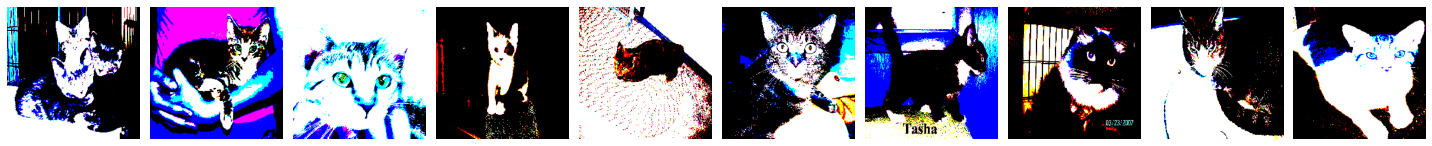

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


In [60]:
plotImages(test_imgs)
print(test_labels)

Just as we saw before, cats are labeled with a *one-hot encoding* of `[1,0]`, and dogs are labeled as `[0,1]`.

Note, because we chose to not shuffle our test set when we originally created it, the first half of the test data is all cats, and the second half is all dogs. Also, recall that the color data appears skewed due to the VGG16 preprocessing we specified when we created the data sets.

Next cell gives an array that has all the corresponding labels for each image in the test set.

In [61]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Now we'll use our previously built model and call `model.predict()` to have the model predict on the test set.

In [62]:
predictions = model.predict(x=test_batches, verbose=0)

We pass in the test set, `test_batches`, and set `steps` to be then length of `test_batches`. Similar to `steps_per_epoch` that was introduced in the last episode, `steps` specifies how many batches to yield from the test set before declaring one prediction round complete.

We also specify `verbose=0` to see no output during the evaluation process.

After running the predictions, we can print our the rounded predictions see what they look like.

In [63]:
np.round(predictions)[0:10]

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

**Plotting Predictions With A Confusion Matrix**

To get a better visualization of these results, we'll plot them in a confusion matrix.

In [64]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

To the confusion matrix, we pass the true labels of the test set, along with the predicted labels for the test set from the model.

Note, we can access the unshuffled true labels for the test set by calling test_batches.classes.

```python
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)
```
We transform the one-hot encoded predicted labels to be in the same format as the true labels by only selecting the element with the highest value for each prediction using `np.argmax(predictions, axis=-1)`.

We then define the `plot_confusion_matrix()` function that is copied directly from [scikit-learn](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py).

In [65]:
def plot_confusion_matrix(cm, classes, 
                         normalize=False, 
                         title="Confusion_matrix",
                         cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalizing can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:np.newaxis]
        print("")
    else:
        print("")
        
    print(cm)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

We can then inspect the `class_indices` for the labels so that we know in which order to pass them to our confusion matrix.

In [66]:
test_batches.class_indices

{'cat': 0, 'dog': 1}

Finally, we plot the confusion matrix.


[[38 12]
 [14 36]]


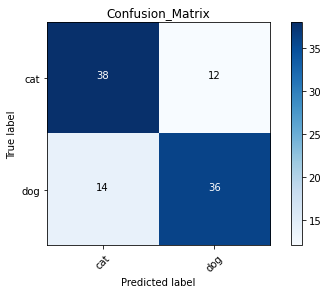

In [67]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion_Matrix')

We can see that the model correctly predicted that an image was a cat `36` times when it actually was a cat, and it incorrectly predicted that an image was a cat `17` times when it was not a cat. It correctly predicted that an image was a dog `33` times, and incorrectly predicted that an image was a dog `14` times.

Given what we saw last time from the validation metrics, these results are not surprising.

Now that we have a general understanding for how to build and work with a CNN using Keras, we'll now move on to working with a pre-trained model on this data set, which we will see will generalize much better!

### Build fine-tuned VGG16 model

**VGG16 And ImageNet**

The pre-trained model we'll be working with to classify images of cats and dogs is called VGG16, which is the model that won the 2014 [ImageNet](https://image-net.org/) competition.

In the ImageNet competition, multiple teams compete to build a model that best classifies images from the ImageNet library. The ImageNet library houses thousands of images belonging to `1000` different categories.

We'll import this VGG16 model and then fine-tune it using Keras. The fine-tuned model will not classify images as one of the `1000` categories for which it was trained on, but instead it will only work to classify images as either cats or dogs.

Note that dogs and cats were included in the ImageNet library from which VGG16 was originally trained. Therefore, the model has already learned the features of cats and dogs. Given this, the fine-tuning we'll do on this model will be very minimal. In later episodes, we'll do more involved fine-tuning and utilize transfer learning to classify completely new data than what was included in the training set.

Using this interface, you can create a VGG model using the **pre-trained weights** provided by the Oxford group and use it as a **starting point** in your own model, or use it as a model directly for classifying images. [VGG Paper](https://arxiv.org/pdf/1409.1556.pdf)

The number 16 refers to the fact that the network has 16 trainable layers (i.e. layers that have weights).
<img src="./images/VGG16.png" alt="Drawing" style="width:600px;"/>

**Fine Tuning and Transfer Learning Deep Convolutional Neural Networks (DCNNs):**

In practice, we don’t usually train an entire DCNN from scratch with random initialization. This is because it is relatively rare to have a dataset of sufficient size that is required for the depth of network required. Instead, it is common to pre-train a DCNN on a very large dataset and then use the trained DCNN weights either as an initialization or a fixed feature extractor for the task of interest.

**Fine-Tuning:** Transfer learning strategies depend on various factors, but the two most important ones are the size of the new dataset, and its similarity to the original dataset. Keeping in mind that DCNN features are more generic in early layers and more dataset-specific in later layers, there are four major scenarios:

1. New dataset is smaller in size and similar in content compared to original dataset: If the data is small, it is not a good idea to fine-tune the DCNN due to overfitting concerns. Since the data is similar to the original data, we expect higher-level features in the DCNN to be relevant to this dataset as well. Hence, the best idea might be to train a linear classifier on the CNN-features.

2. New dataset is relatively large in size and similar in content compared to the original dataset: Since we have more data, we can have more confidence that we would not over fit if we were to try to fine-tune through the full network.

3. New dataset is smaller in size but very different in content compared to the original dataset: Since the data is small, it is likely best to only train a linear classifier. Since the dataset is very different, it might not be best to train the classifier from the top of the network, which contains more dataset-specific features. Instead, it might work better to train a classifier from activations somewhere earlier in the network.

4. New dataset is relatively large in size and very different in content compared to the original dataset: Since the dataset is very large, we may expect that we can afford to train a DCNN from scratch. However, in practice it is very often still beneficial to initialize with weights from a pre-trained model. In this case, we would have enough data and confidence to fine-tune through the entire network.

**Fine-tuning DCNNs:** For a given prediction problem, we fall under scenario iv. We fine-tune the weights of the pre-trained DCNN by continuing the backpropagation. It is possible to fine-tune all the layers of the DCNN, or it’s possible to keep some of the earlier layers fixed (due to overfitting concerns) and only fine-tune some higher-level portion of the network. This is motivated by the observation that the earlier features of a DCNN contain more generic features (e.g. edge detectors or color blob detectors) that should be useful to many tasks, but later layers of the DCNN becomes progressively more specific to the details of the classes contained in the given dataset.

**Transfer learning constraints:** As we use a pre-trained network, we are slightly constrained in terms of the model architecture. For example, we can’t arbitrarily take out convolutional layers from the pre-trained network. However, due to parameter sharing, we can easily run a pre-trained network on images of different spatial size. This is clearly evident in the case of Convolutional and Pool layers because their forward function is independent of the input volume spatial size. In case of Fully Connected (FC) layers, this still holds true because FC layers can be converted to a Convolutional Layer.

**Learning rates:** We use a smaller learning rate for DCNN weights that are being fine-tuned under the assumption that the pre-trained DCNN weights are relatively good. We don’t wish to distort them too quickly or too much, so we keep both our learning rate and learning rate decay really small.

**VGG16 Preprocessing:**

Let's first check out a batch of training data using the plotting function we brought in previously.

When we previously inspected these images, we briefly discussed that the color data was ***skewed*** as a result of preprocessing the images using the `tf.keras.applications.vgg16.preprocess_input` function.

In [68]:
next(train_batches)[0].shape

(10, 224, 224, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

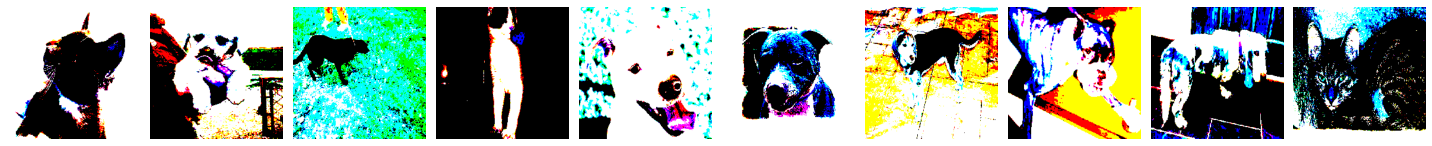

[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]]


In [69]:
imgs, labels = next(train_batches)
plotImages(imgs)
print(labels)

To understand what preprocessing is needed for images that will be passed to a VGG16 model, we can look at the [VGG16 paper](https://arxiv.org/pdf/1409.1556.pdf).

Under the **2.1 Architecture** section, we can see that the authors stated that, _"The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel."_

This is the preprocessing that was used on the original training data, and therefore, this is the way we need to process images before passing them to VGG16 or a fine-tuned VGG16 model.

This processing is what is causing the underlying color data to look distorted.

**Building A Fine-Tuned Model**

We'll import the VGG16 model from Keras.

In [108]:
# Download model - Internemt connection needed
vgg16_model = tf.keras.applications.vgg16.VGG16()

The original trained VGG16 model, along with its saved weights and other parameters, is now downloaded onto our machine.

We can check out a summary of the model just to see what the architecture looks like.

In [109]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

**Note:** VGG16 model originally was predicting for `1000` different imagenet classes. From the last row of `vgg16_model.summary()` you can see the output layer of the VGG16 model has `1000` different outputs:

`predictions (Dense)          (None, 1000)              4097000   `

So, our objective is going to simply change the last output layer to predict only `2` output classes corresponding to cat and dog.

The next two cells are used to ensure that the model is coorectly imported.

In [117]:
def count_params(model):
    non_trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.non_trainable_weights])
    trainable_params = np.sum([np.prod(v.get_shape().as_list()) for v in model.trainable_weights])
    return {'non_trainable_params': non_trainable_params, 'trainable_params': trainable_params}

**Calculations**:

- *first layer weights*: `vgg16_model.trainable_weights[0]` $\rightarrow$ (3, 3, 3, 64) $\rightarrow$ 1728
- *first layer biases*: `vgg16_model.trainable_weights[1]` $\rightarrow$ (64,) $\rightarrow$ 64
- *second layer weights*: `vgg16_model.trainable_weights[2]` $\rightarrow$ (3, 3, 64, 64) $\rightarrow$ 36864
- *second layer biases*: `vgg16_model.trainable_weights[3]` $\rightarrow$ (64,) $\rightarrow$ 64

In [132]:
vgg16_model.trainable_weights[1]

<tf.Variable 'block1_conv1/bias:0' shape=(64,) dtype=float32, numpy=
array([ 0.73429835,  0.09340367,  0.06775674,  0.8862966 ,  0.25994542,
        0.66426694, -0.01582893,  0.3249065 ,  0.68600726,  0.06247932,
        0.58156496,  0.2361475 ,  0.69694996,  0.19451167,  0.4858922 ,
        0.44571847,  0.5113422 ,  0.208576  ,  0.57557714,  0.33199573,
        0.4997983 ,  0.7117759 ,  0.30284074,  0.7082712 ,  0.04548979,
        0.7446502 ,  0.29845494,  0.48211655,  0.81658626,  0.62603897,
        0.3768093 ,  2.064037  ,  0.77311045,  0.3459577 ,  0.6130958 ,
        0.65459156,  0.39045632,  0.50869167,  0.2625384 ,  0.23669638,
        0.07971057,  1.1179353 ,  0.26129362,  0.8697589 ,  0.21543622,
        0.78007823,  0.37015367,  0.47993386,  0.4313978 ,  0.5084194 ,
        0.23049663,  0.7636527 ,  0.35419866,  0.45794216,  0.4662595 ,
        0.09850298,  0.3803252 ,  0.66880196,  0.4015123 ,  0.90510356,
        0.43166816,  1.302014  ,  0.5306885 ,  0.48993504], dtype=f

In [133]:
params = count_params(vgg16_model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 138357544

In contrast, recall how much simpler the CNN was that we worked with previously. VGG16 is much more complex and sophisticated and has many more layers than our previous model.

Notice that the last `Dense` layer of VGG16 has `1000` outputs. These outputs correspond to the `1000` categories in the ImageNet library.

Since we're only going to be classifying two categories, cats and dogs, we need to modify this model in order for it to do what we want it to do, which is to only classify cats and dogs.

Before we do that, note that the type of Keras models we've been working with so far in this series have been of type `Sequential`.

If we check out the type of model `vgg16_model` is, we see that it is of type `Model`, which is from the Keras' `Functional` API.

In [74]:
type(vgg16_model)

tensorflow.python.keras.engine.functional.Functional

We've not yet worked with the more sophisticated `Functional` API, although we will work with it later, using the MobileNet model.

For now, we're going to go through a process to convert the `Functional` model to a `Sequential` model, so that it will be easier for us to work with given our current knowledge.

We first create a new model of type `Sequential`. We then iterate over each of the layers in `vgg16_model`, except for the last layer, and add each layer to the new `Sequential` model.

In [75]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [76]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [77]:
params = count_params(model)
assert params['non_trainable_params'] == 0
assert params['trainable_params'] == 134260544

Now, we have replicated the entire `vgg16_model` (excluding the output layer) to a new `Sequential` model, which we've just given the name `model`.

Next, we'll iterate over each of the layers in our new `Sequential` model and set them to be non-trainable. This freezes the weights and other trainable parameters in each layer so that they will not be trained or updated when we later pass in our images of cats and dogs.

In [78]:
for layer in model.layers:
    layer.trainable = False

The reason we don't want to retrain these layers is because, as mentioned earlier, cats and dogs were already included in the original ImageNet library. So, VGG16 already does a nice job at classifying these categories. We only want to modify the model such that the output layer understands only how to classify cats and dogs and nothing else. Therefore, we don't want any re-training to occur on the earlier layers.

Next, we add our new output layer, consisting of only `2` nodes that correspond to `cat` and `dog`. This output layer will be the only trainable layer in the model.

In [79]:
model.add(Dense(units=2, activation='softmax'))

We can now check out a `summary` of our model and see that everything is exactly the same as the original `vgg16_model`, except for now, the output layer has only 2 nodes, rather than `1000`, and the number of `trainable parameters` has drastically decreased since we froze all the parameters in the earlier layers.

In [80]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [81]:
params = count_params(model)
assert params['non_trainable_params'] == 134_260_544
assert params['trainable_params'] == 8194

### Train the fine-tuned VGG16 model

Using our new model, the first thing we'll do is `compile` it.

Similar to how we've compiled models in previous episodes, we'll use the `Adam` optimizer with a learning rate of `0.0001`, `categorical_crossentropy` as our loss, and `‘accuracy'` as our metric.

In [82]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Now, we'll train the model using `model.fit()`.

Note that the call to `fit()` is exactly the same as it was when we used it on the original CNN we built from scratch previously, except for we're only running `5` epochs this time, as opposed to `10`.

In [83]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=5, verbose=2)

Epoch 1/5
100/100 - 1560s - loss: 0.3714 - accuracy: 0.8360 - val_loss: 0.1001 - val_accuracy: 0.9500
Epoch 2/5
100/100 - 1550s - loss: 0.0936 - accuracy: 0.9730 - val_loss: 0.0634 - val_accuracy: 0.9750
Epoch 3/5
100/100 - 1313s - loss: 0.0649 - accuracy: 0.9840 - val_loss: 0.0536 - val_accuracy: 0.9750
Epoch 4/5
100/100 - 731s - loss: 0.0507 - accuracy: 0.9910 - val_loss: 0.0438 - val_accuracy: 0.9800
Epoch 5/5
100/100 - 754s - loss: 0.0414 - accuracy: 0.9930 - val_loss: 0.0409 - val_accuracy: 0.9800


In [84]:
assert model.history.history.get('accuracy')[-1] > 0.95

Looking at the results from training, we can see just after `5` epochs, we have some pretty outstanding results, especially when you compare it to the results we got from our original model.

Our accuracy starts off at `88%` and goes over `99%` in just 5 epochs. Similarly, our validation accuracy increases from `95%` to `98%`.

The most noticeable improvement is that this model is generalizing very well to the validation data, unlike the CNN we build from scratch previously.

### Predict using fine-tuned VGG16 model

We now call `model.predict` to have the model predict on the test data.

In [85]:
predictions = model.predict(x=test_batches, verbose=0)

In [86]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

We're now going to create a confusion matrix so we can visualize our predictions. 

In [87]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

In [88]:
test_batches.class_indices

{'cat': 0, 'dog': 1}


[[50  0]
 [ 0 50]]


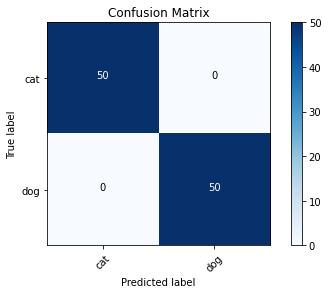

In [89]:
cm_plot_labels = ['cat', 'dog']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

We can see that the model incorrectly predicted only `0` samples out of `100`. This gives us `100%` accuracy on the test set, proving this model to be much more capable of generalizing than the previous CNN we built from scratch.

# MobileNet

MobileNets are a class of small, low-latency, low-power models that can be used for classification, detection, and other common tasks convolutional neural networks are good for. Because of their small size, these are considered great deep learning models to be used on mobile devices.

**Comparing MobileNets To Other Models**

To give a quick comparison in regards to size, the size of the full VGG16 network on disk is about `553` megabytes. The size of one of the currently largest MobileNets is about `17` megabytes, so that is a huge difference, especially when you think about deploying a model to a mobile app or running it in the browser.

|**Model**|**Size**|**Parameters**|
|:-|:-|:-|
|VGG16|`553 MB`|`138,000,000`|
|Mobile Net|`17MB`|`4,200,000`|

This vast size difference is due to the number of parameters within these networks. For example, VGG16 has 138 million parameters, while the 17 megabyte MobileNet we just mentioned has only 4.2 million.

Aside from the size of the networks on disk, the size of the networks in memory also grows as the number of network parameters grow. In later episodes, we're going to test and demonstrate the performance differences between these models, so stay tuned for that.

Now, while MobileNets are faster and smaller than other major networks, like VGG16, for example, there is a tradeoff. That tradeoff is accuracy, but don't let this discourage you.

Yes, MobileNets typically aren't as accurate as these other large, resource-heavy models, but they still actually perform very well, with really only a relatively small reduction in accuracy. Here is a [MobileNets paper](https://arxiv.org/pdf/1704.04861.pdf) that elaborates further on this tradeoff if you're interested in studying this further.

Now let's see how we can start working with MobileNets in Keras.

In [134]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

A GPU is not required to follow the upcoming code, but if you are using one, you'll need to first follow the GPU setup

In [138]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# print("Num GPUs Available: ", len(physical_devices))
# tf.config.experimental.set_memory_growth(physical_devices[0], True)

What we're going to do is download a MobileNet model, and then use it for inference just on a few random images to see how well it classifies these images according to ImageNet classes.

We first make a call to `tf.keras.applications.mobilenet.MobileNet()` to obtain a copy of a single pretrained MobileNet with weights that were saved from being trained on ImageNet images. We're assigning this model to the variable `mobile`.

In [139]:
mobile = tf.keras.applications.mobilenet.MobileNet()

Next, we have a function called `prepare_image()` that accepts an image `file`, and processes the image to get it in a format that the model expects. We'll be passing each of our images to this function before we use MobileNet to predict on it, so let's see what exactly this function is doing.

In [140]:
def prepare_image(file):
    img_path = '../../Image-Classification/data/MobileNet-samples/'
    img = image.load_img(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    return tf.keras.applications.mobilenet.preprocess_input(img_array_expanded_dims)

Within this function, we first define the relative path to the images. I have all the sample images we'll be using stored in `data/MobileNet-samples`.

We then call the Keras function `image.load_img()` which accepts the image file and a `target_size` for the image, which we're setting to `(224,224)` (which is the default size for MobileNet). `load_img()` returns an instance of a PIL image.

We then convert the PIL image into an array with the Keras `img_to_array()` function, and then we expand the dimensions of that array by using numpy's `expand_dims()`.

Lastly, we're calling `preprocess_input()` from `tf.keras.applications.mobilenet`, which preprocesses the given image data to be in the same format as the images that MobileNet was originally trained on. Specifically, it's scaling the pixel values in the image between `-1` and `1`, and this function will return the preprocessed image data as a numpy array.

This result is what we're returning within this overall `prepare_image()` function.

Let's now get some predictions from MobileNet and see how it performs. We'll be using some random sample images.
Here is our first image, a lizard.

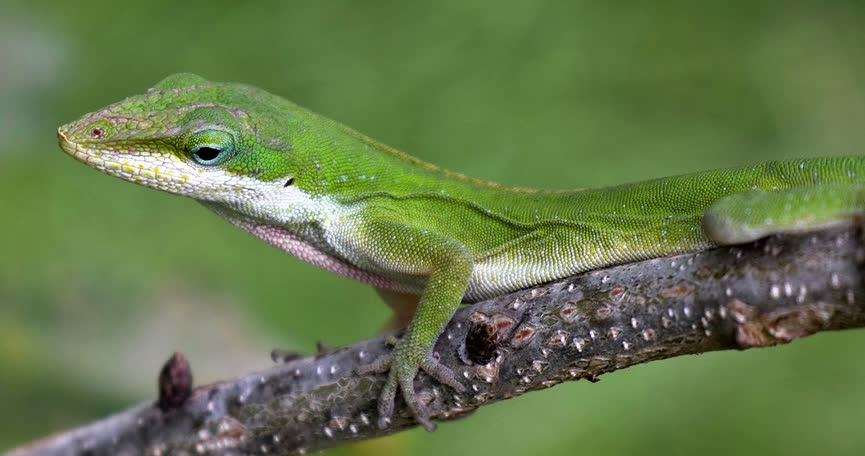

In [141]:
from IPython.display import Image
Image(filename='../../Image-Classification/data/MobileNet-samples/1.PNG', width=300,height=200) 

We're going to process this image by passing it to our `prepare_image()` function and assign the result to this `preprocessed_image` variable. We're then having MobileNet predict on this image by calling `mobile.predict()` and passing it our `preprocessed_image`.

In [142]:
preprocessed_image = prepare_image('1.PNG')
predictions = mobile.predict(preprocessed_image)

Then, we're using an ImageNet utility function provided by Keras called `decode_predictions()`. It returns the top five ImageNet class predictions with the ImageNet class ID, the class label, and the probability. With this, we'll be able to see the five ImageNet classes with the highest prediction probabilities from our model on this given image. Recall that there are 1000 total ImageNet classes.

In [143]:
results = imagenet_utils.decode_predictions(predictions)
results

[[('n01682714', 'American_chameleon', 0.65274656),
  ('n01693334', 'green_lizard', 0.1894329),
  ('n01687978', 'agama', 0.13799648),
  ('n01689811', 'alligator_lizard', 0.013600811),
  ('n01688243', 'frilled_lizard', 0.0043153004)]]

The lizard in the image is actually an American chameleon, so the model did well at assigning that class the highest probability. The remaining four classes are all different types of similar lizards as well, so overall I'd say the model did a good job at classifying this one.

Let's do another prediction, this time on this delicious looking cup of espresso.

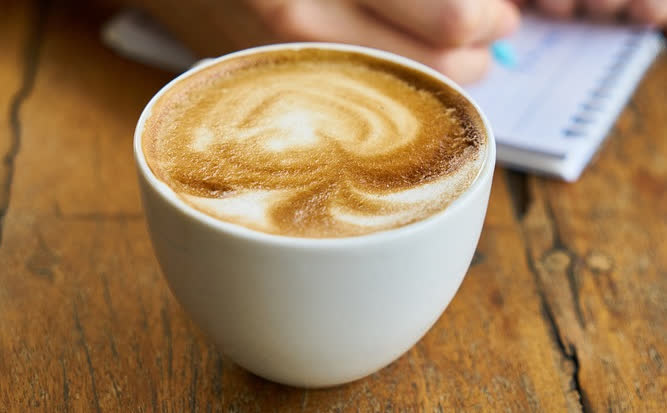

In [144]:
Image(filename='../../Image-Classification/data/MobileNet-samples/2.PNG', width=300,height=200)

In [145]:
preprocessed_image = prepare_image('2.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07920052', 'espresso', 0.9766625),
  ('n07930864', 'cup', 0.0100934915),
  ('n07932039', 'eggnog', 0.00859704),
  ('n03063599', 'coffee_mug', 0.0036651783),
  ('n04597913', 'wooden_spoon', 0.0004963663)]]

Let's check out another one. This time we'll be passing an image of a strawberry.

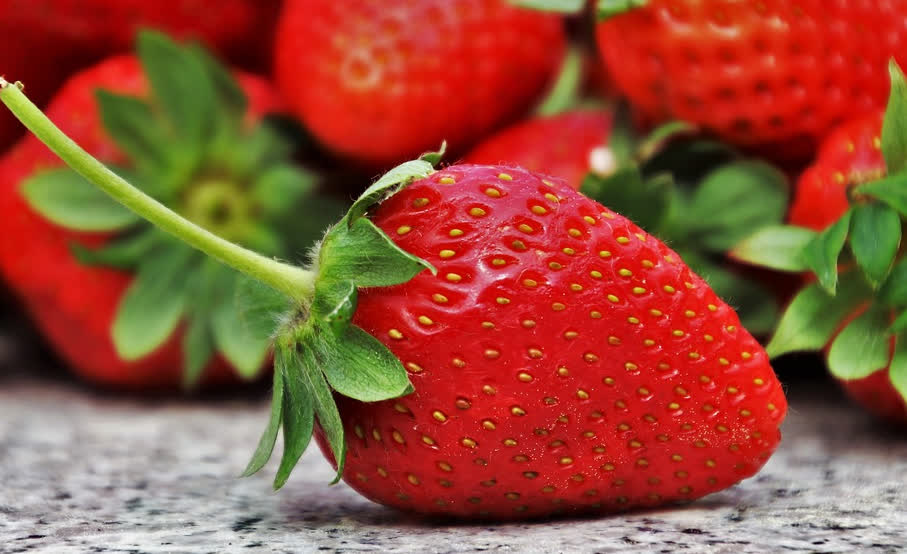

In [133]:
Image(filename='../../Image-Classification/data/MobileNet-samples/3.PNG', width=300,height=200) 

In [135]:
preprocessed_image = prepare_image('3.PNG')
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results

[[('n07745940', 'strawberry', 0.99999344),
  ('n07749582', 'lemon', 1.2441996e-06),
  ('n07747607', 'orange', 8.602372e-07),
  ('n07753275', 'pineapple', 8.2781554e-07),
  ('n07768694', 'pomegranate', 6.261009e-07)]]

## Fine-Tuned MobileNet on sign language digits

Next, we'll be building on what we've learned about MobileNet to prepare and process our own custom image data set of sign language digits. These images will be later used to train our fine-tuned MobileNet model.

The new data set we'll be working with now does not have classes that were included in ImageNet, nor very similar to the ImageNet classes that MobileNet was originally trained on. We'll later go through the process together for tuning the model to predict on this new data.

This data set contains images of sign language digits. There are ten classes, labeled as `0` through `9`, and each class is made up of images of hands showing the sign for that particular digit.

<img src="./images/hand-sign.png" alt="Drawing" style="width:600px;"/>

Each class has between `204` and `208` samples. The total data set contains `2062` samples.

This data set is available as grayscale images [on Kaggle](https://www.kaggle.com/ardamavi/sign-language-digits-dataset) and is also available as RGB images [on Github](https://github.com/ardamavi/Sign-Language-Digits-Dataset/tree/master/Examples). We'll be using the RGB data set.

- 10 classes (digits 0-9)
- Class data:
    - class 0: 205 images
    - class 1: 206 images
    - class 2: 206 images
    - class 3: 206 images
    - class 4: 207 images
    - class 5: 207 images
    - class 6: 207 images
    - class 7: 206 images
    - class 8: 208 images
    - class 9: 204 images

Download data and save in current dirrectory/data/Sign-Language-Digits-Dataset. Extract sub-directories labeled 0 through 9 and nest directories directly undermeath Sign-Language-Dataset directory. Directory structure should lool like this:
- data/
    - Sign-Language-Digits-Dataset
        - 0/
        - 1/
        - 2/
        - ...
        - 9/

### Organize The Data

First, we create `train`, `valid`, and `test` directories.

We then move all class directories (`0` - `9`) with their respective images from `Sign-Language-Digits-Dataset` into the `train` directory.

We then make class directories (`0` - `9`) for the valid and test data sets as well.

We then loop through each class directory in the `train` directory and randomly move `30` images from each class into the corresponding class directory in `valid` and `5` images from each class into the corresponding class directory in `test`.

In [138]:
# Organize data into train, valid, test dirs
os.chdir('../../Image-Classification/data/Sign-Language-Digits-Dataset')
if os.path.isdir('train/0/') is False: 
    os.mkdir('train')
    os.mkdir('valid')
    os.mkdir('test')

    for i in range(0, 10):
        shutil.move(f'{i}', 'train')
        os.mkdir(f'valid/{i}')
        os.mkdir(f'test/{i}')

        valid_samples = random.sample(os.listdir(f'train/{i}'), 30)
        for j in valid_samples:
            shutil.move(f'train/{i}/{j}', f'valid/{i}')

        test_samples = random.sample(os.listdir(f'train/{i}'), 5)
        for k in test_samples:
            shutil.move(f'train/{i}/{k}', f'test/{i}')

os.chdir('../../../CS-Tutorial/Extra')

### Process The Data

After our image data is all organized on disk, we need to create the directory iterators for the train, validation, and test sets in the exact same way as we did for the cat and dog data set

In [139]:
train_path = '../../Image-Classification/data/Sign-Language-Digits-Dataset/train'
valid_path = '../../Image-Classification/data/Sign-Language-Digits-Dataset/valid'
test_path = '../../Image-Classification/data/Sign-Language-Digits-Dataset/test'

train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=train_path, target_size=(224,224), batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=valid_path, target_size=(224,224), batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)

Found 1712 images belonging to 10 classes.
Found 300 images belonging to 10 classes.
Found 50 images belonging to 10 classes.


Notice the `preprocessing_function` parameter we're supplying to `ImageDataGenerator`. We're setting this equal to `tf.keras.applications.mobilenet.preprocess_input`. This is going to do the necessary MobileNet preprocessing on the images obtained from `flow_from_directory()`.

To `flow_from directory()`, we're passing in the path to the data set, the `target_size` to resize the images to, and the `batch_size` we're choosing to use for training. We do this exact same thing for all three data sets: train, validation, and test.

For `test_batches`, we're also supplying one additional parameter, `shuffle=False`, which causes the test dataset to not be shuffled, so that we can access the corresponding non-shuffled test labels to plot to a confusion matrix later.

In [140]:
assert train_batches.n == 1712
assert valid_batches.n == 300
assert test_batches.n == 50
assert train_batches.num_classes == valid_batches.num_classes == test_batches.num_classes == 10

### Build and Modify the Fine-Tuned Model

Now, we'll download the MobileNet model, and print a summary of it.

In [146]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [147]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [143]:
params = count_params(mobile)
assert params['non_trainable_params'] == 21888
assert params['trainable_params'] == 4231976

Next, we're going to grab the output from the sixth to last layer of the model and store it in this variable `x`.

In [158]:
x = mobile.layers[-6].output

> **Note on `model.layers[index].output`**: The output will be placed at the `layer[index]`; the previous layers will be kept but the layers after `layer[index]` will be eliminated!

We'll be using this to build a new model. This new model will consist of the original MobileNet up to the sixth to last layer. We're not including the last five layers of the original MobileNet.

By looking at the summary of the original model, we can see that by not including the last five layers, we'll be including everything up to and including the last `global_average_pooling` layer.

Note that the amount of layers that we choose to cut off when you're fine-tuning a model will vary for each scenario, but I've found through experimentation that just removing the last `5` layers here works out well for this particular task. So with this setup, we'll be keeping the vast majority of the original MobileNet architecutre, which has `88` layers total.

Now, we create an output layer that we're calling `output`, which will just be a `Dense` layer with `10` output nodes for the ten corresponding classes, and we'll use the `softmax` activation function.

In [153]:
output = Dense(units=10, activation='softmax')(x)

Now, we construct the new fine-tuned model, which we're calling `model`.

In [154]:
model = Model(inputs=mobile.input, outputs=output)

Note, you can see by the `Model` constructor used to create our model, that this is a model that is being created with the Keras `Functional` API, not the `Sequential` API that we've worked with in previous episodes. That's why this format that we're using to create the model may look a little different than what you're used to.

To build the new model, we create an instance of the `Model` class and specify the `inputs` to the model to be equal to the input of the original MobileNet, and then we define the `outputs` of the model to be equal to the `output` variable we created directly above.

This creates a new model, which is identical to the original MobileNet up to the original model's sixth to last layer. We don't have the last five original MobileNet layers included, but instead we have a new layer, the output layer we created with ten output nodes.

Now, we need to choose how many layers we actually want to be trained when we train on our new data set.

We still want to keep a lot of what the original MobileNet has already learned from ImageNet by freezing the weights in many of layers, especially earlier ones, but we do indeed need to train some layers since the model still needs to learn features about this new data set.

I did a little experimenting and found that training the last `23` layers will give us a pretty decently performing model.

In [155]:
for layer in model.layers[:-23]:
    layer.trainable = False

Note that `23` is not necessarily the optimal number of layers to train. Play around with this some yourself and let me know in the comments if you can get better results by training more or less layers than the results we'll see in a few minutes.

So the twenty-third-to-last layer and all layers after it will be trained when we fit the model on the new data set. All layers above will not be trained, so their original ImageNet weights will stay in place.

Looking at the model summary now, we can see the new model architecture, along with how the number of trainable parameters has changed from the original model.

In [156]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

**Train The Model**

Now, we compile the model in the same way as we've done with other models in this course.

In [149]:
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

Similarly, we call `fit()` to train the model in the same fashion as we've done for other models.

In [150]:
# Run for more epochs (~30) to see better results
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
172/172 - 59s - loss: 0.6189 - accuracy: 0.8224 - val_loss: 0.3423 - val_accuracy: 0.8767
Epoch 2/10
172/172 - 53s - loss: 0.1296 - accuracy: 0.9755 - val_loss: 0.1780 - val_accuracy: 0.9433
Epoch 3/10
172/172 - 53s - loss: 0.0607 - accuracy: 0.9930 - val_loss: 0.1332 - val_accuracy: 0.9600
Epoch 4/10
172/172 - 55s - loss: 0.0465 - accuracy: 0.9942 - val_loss: 0.0791 - val_accuracy: 0.9800
Epoch 5/10
172/172 - 54s - loss: 0.0264 - accuracy: 0.9988 - val_loss: 0.1243 - val_accuracy: 0.9633
Epoch 6/10
172/172 - 61s - loss: 0.0199 - accuracy: 0.9982 - val_loss: 0.0476 - val_accuracy: 0.9833
Epoch 7/10
172/172 - 62s - loss: 0.0122 - accuracy: 0.9994 - val_loss: 0.0448 - val_accuracy: 0.9867
Epoch 8/10
172/172 - 62s - loss: 0.0141 - accuracy: 0.9988 - val_loss: 0.0472 - val_accuracy: 0.9867
Epoch 9/10
172/172 - 73s - loss: 0.0097 - accuracy: 0.9994 - val_loss: 0.0467 - val_accuracy: 0.9833
Epoch 10/10
172/172 - 81s - loss: 0.0070 - accuracy: 0.9994 - val_loss: 0.0458 - val_accura

The accuracy on the training set has reached `100%` pretty early in the training. Our validation accuracy is lagging some, only at `90%`, so we have a little overfitting going on here, but we can see that it had not stalled out by the time we reached our last epoch.

Perhaps running more epochs will yield better results. Try it yourself! Also, feel free to adjust any hyper parameters, train more or less layers, and generally experiment to see if you can get better results than this.

### Predict sign language digits

We set up our `test_labels` in the same way as we've seen in earlier episodes by grabbing the `classes` from our unshuffled test set.

In [152]:
test_labels = test_batches.classes

We use `model.predict()` to run the predictions in the same fashion as we've used this function in previous episodes.

In [153]:
predictions = model.predict(x=test_batches, verbose=0)

We then create a `confusion_matrix` object using scikit-learn's `confusion_matrix` that we imported previously.

In [154]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

We now bring in the same `plot_confusion_matrix` function from scikit-learn that we've used in the past to plot the confusion matrix.

In [155]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Now we're just printing the `class_indices` from our `test_batches` so that we can see the order of the classes and specify them in that same order when we create the labels for our confusion matrix.

In [156]:
test_batches.class_indices

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

After creating the labels, we then plot our confusion matrix.

Confusion matrix, without normalization
[[5 0 0 0 0 0 0 0 0 0]
 [0 5 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0]
 [0 0 0 5 0 0 0 0 0 0]
 [0 0 0 0 5 0 0 0 0 0]
 [0 0 0 0 0 5 0 0 0 0]
 [0 0 0 0 1 0 4 0 0 0]
 [0 0 0 0 0 0 0 5 0 0]
 [0 0 0 0 0 0 0 0 5 0]
 [0 0 0 0 0 0 0 0 0 5]]


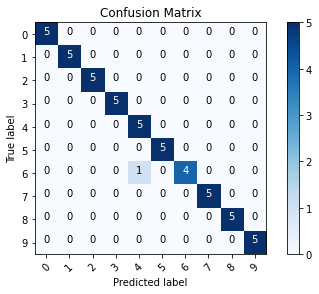

In [157]:
cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

Looking pretty good! Just checking out the diagonal in blue that contains all the correctly predicted samples, we can get an idea that the model did pretty well. Each class had `5` samples, and we see a decent amount of `5`s here.

Total, the model gave *one* incorrect prediction out of *fifty* total, which gives us an accuracy of `98%` on the test set. 

## Data Augmentation

Data augmentation occurs when new data is created based on modifications of existing data. Data augmentation on images would include transformations like:

- Flipping the image either horizontally or vertically
- Rotating the image
- Zooming in or out on the image
- Cropping the image
- Varying the color on the image

In [158]:
import matplotlib.pyplot as plt
import numpy as np
import os
import random
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

Next, we'll use this `plotImages()` function obtained from [TensorFlow's documentation](https://www.tensorflow.org/tutorials/images/classification#visualize_training_images) to plot the processed images within our Jupyter notebook.

In [159]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

We'll now define this variable called `gen` as an `ImageDataGenerator`. All the parameters being passed are the different ways we're telling Keras to augment the image.

In [160]:
gen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

#### `ImageDataGenerator` arguments:

- *rotation_range*: `Int`. Degree range for random rotations.
- *width_shift_range*: Float, 1-D array-like or int. When float, it shows fraction of total width, `if < 1`, or pixels `if >= 1`.
- *height_shift_rang*: Float, 1-D array-like or int. When float, it shows fraction of total hight, `if < 1`, or pixels `if >= 1`.
- *shear_range*: Float. Shear Intensity (Shear angle in counter-clockwise direction in degrees)
<img src="./images/shear.png" alt="Drawing" style="width:400px;"/>
- *zoom_range*: Float or `[lower, upper]`. Range for random zoom.
- *channel_shift_range*: Float. Range for random channel shifts. Channel shift randomly shifts the channel values by a random value chosen from the range specified by channel_shift_range
- *horizontal_flip*: Boolean. Randomly flip inputs horizontally.

Next, we choose a random image of a dog from disk.

In [162]:
chosen_image = random.choice(os.listdir('../../Image-Classification/data/dogs-vs-cats/train/dog'))

We then create a variable called `image_path` and set that to the relative location on disk of the chosen image.

In [163]:
image_path = '../../Image-Classification/data/dogs-vs-cats/train/dog/' + chosen_image

Next, we'll obtain the image by reading the image from disk by using `plt.imread()` and passing in the `image_path`. We also, expand the dimensions so that the image is compatible for how we'll use it later.

In [164]:
image = np.expand_dims(plt.imread(image_path),0)

Now, we'll plot the image just to see what the original image looks like.

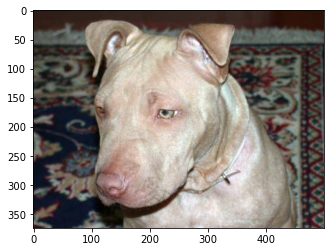

In [165]:
plt.imshow(image[0])

Next, we'll generate batches of augmented images from the original image.

In [166]:
aug_iter = gen.flow(image)

The `flow()` function takes numpy data and generates batches of augmented data.

Now we'll get ten samples of the augmented images.

In [167]:
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

Now we'll plot the augmented images.

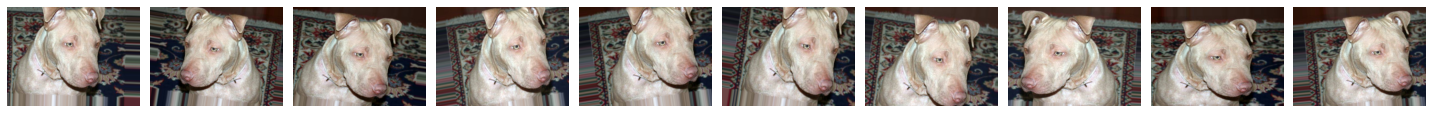

In [168]:
plotImages(aug_images)

These are ten images that have been augmented from the original image according to the parameters we passed to the `ImageDataGenerator` earlier.

We can see that some of the images have been flipped horizontally, some have slight color variation, some are tilted slightly to the left or right, and some are shifted down or up slightly.

### Save Augmented Data

Note, if you'd like to save these images so that you can add them to your training set, then to `gen.flow()`, you should also specify the parameter `save_to_dir` and set it equal to a valid location on disk.

You can optionally specify a prefix for which to prepend to file names of the saved augmented images, as well as optionally specify the file type as `'png'` or `'jpeg'` images. `'png'` is the default.

In [169]:
aug_iter = gen.flow(image, save_to_dir='../../Image-Classification/data/dogs-vs-cats/train/dog', save_prefix='aug-image-', save_format='jpeg')

Note, you can also use `ImageDataGenerator.flow_from_directory()` as opposed to `ImageDataGenerator.flow()` if you're wanting to generate batches of augmented data from data saved to an organized directory structure on disk. 